In [1]:
from bs4 import BeautifulSoup
import requests
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas


plt.style.use('ggplot')

In [2]:
url_90th='https://en.wikipedia.org/wiki/90th_Missile_Wing_LGM-30_Minuteman_Missile_Launch_Sites'
url_91st='https://en.wikipedia.org/wiki/91st_Missile_Wing_LGM-30_Minuteman_missile_launch_sites'
url_341st='https://en.wikipedia.org/wiki/341st_Missile_Wing_LGM-30_Minuteman_missile_launch_sites'

In [3]:
all_coordinates=[]
for url in [url_90th, url_91st, url_341st]:
    html=requests.get(url,headers).content
    soup=BeautifulSoup(html,'html.parser')
    coordinates=[{'Lat':e.select_one('span[class="latitude"]').text, 'Lon':e.select_one('span[class="longitude"]').text} for e in soup.select('span[class="geo-inline"]')]
    all_coordinates.extend(coordinates)

    print(url,end='\r')

In [4]:
import re


def dms_to_dd(dms_str):
    parts = re.match(r"(\d+)°(\d+)′(\d+)″([NSEW])", dms_str)
    if not parts:
        return None

    degrees, minutes, seconds, direction = parts.groups()
    dd = int(degrees) + int(minutes)/60 + int(seconds)/3600
    if direction in ['S', 'W']:
        dd = -dd
    return dd


all_coordinates_dd=[]
for coordinates in all_coordinates:
    lat=dms_to_dd(coordinates['Lat'])
    lon=dms_to_dd(coordinates['Lon'])
    dict={'Lat':lat,'Lon':lon}
    all_coordinates_dd.append(dict)


In [5]:
coordinates_df=pd.DataFrame(all_coordinates_dd)
usa_df=geopandas.read_file(r'C:\Users\berid\python\geopandas\USA States\s_22mr22.shp')
world_df=geopandas.read_file(r'C:\Users\berid\python\geopandas\world-administrative-boundaries (detailed)\world-administrative-boundaries.shp')

In [6]:
import kagglehub

path = kagglehub.dataset_download("max-mind/world-cities-database")
cities_df=pd.read_csv(f'{path}/worldcitiespop.csv')
cities_df=cities_df[cities_df['Country']=='us']

C:\Users\berid\AppData\Local\Temp\ipykernel_14428\62238153.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  cities_df=pd.read_csv(f'{path}/worldcitiespop.csv')


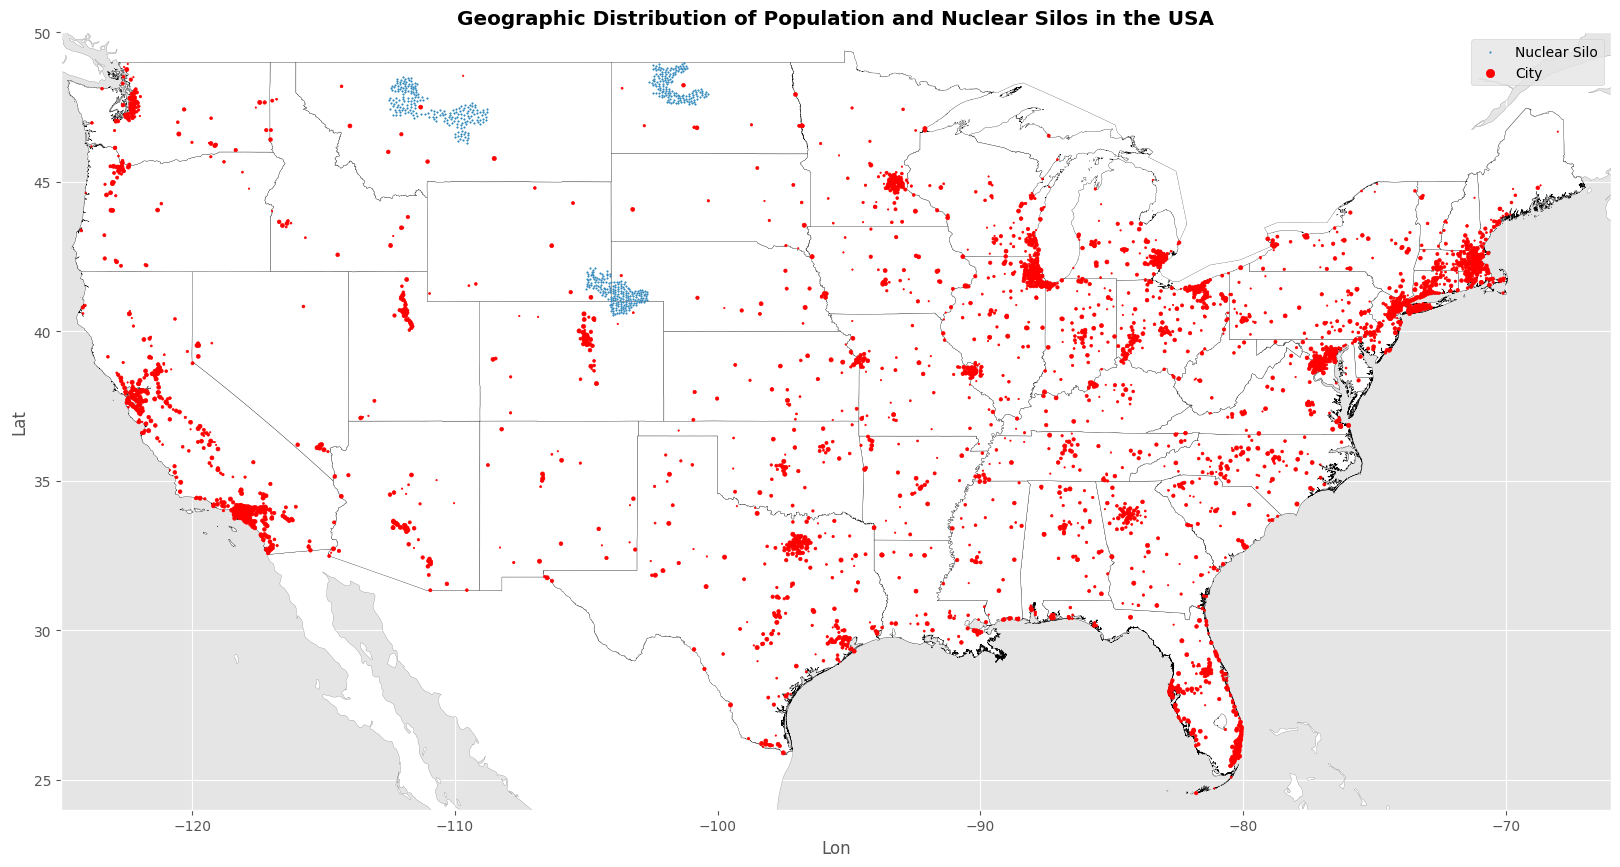

In [7]:
fig, ax = plt.subplots(figsize=(20, 20))
world_df.plot(ax=ax, lw=0.1, color='white', ec='black')
usa_df.plot(ax=ax, lw=0.2, color='white', ec='black')
cities_df.plot.scatter(ax=ax, x='Longitude', y='Latitude', c='red', s=pd.qcut(cities_df['Population'], q=10, labels=False))
coordinates_df.plot.scatter(ax=ax, x='Lon', y='Lat', s=1, label='Nuclear Silo')
ax.scatter([], [], c='red', label='City')
plt.xlim(-125, -66)
plt.ylim(24, 50)
plt.title('Geographic Distribution of Population and Nuclear Silos in the USA', fontweight='bold')
ax.legend()
plt.show()
